In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import numpy as np

In [3]:
G = nx.Graph()

G.add_node('a')
G.add_node('b')
G.add_node('c')

G.add_edge('a', 'b')
G.add_edge('b', 'c')
G.add_edge('c', 'a')

In [4]:
G.adj['a']

AtlasView({'b': {}, 'c': {}})

In [5]:
G.degree['a']

2

In [6]:
G['a']

AtlasView({'b': {}, 'c': {}})

### Atributes


In [7]:
G = nx.Graph(nome='Exemplo')
G.graph

{'nome': 'Exemplo'}

In [8]:
G.add_node('a', cor=(1, 0, 0))
G.add_node('b', cor=(0, 1, 0))
G.add_node('c', cor=(0, 0, 1))

G.add_edge('a', 'b', peso=2)
G.add_edge('b', 'c', peso=-1)
G.add_edge('c', 'a', peso=0)

G.graph

{'nome': 'Exemplo'}

In [18]:
G.nodes

NodeView(('a', 'b', 'c'))

In [19]:
G.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c')])

In [20]:
G.nodes['a']

{'cor': (1, 0, 0)}

In [21]:
list(G.adjacency())

[('a', {'b': {'peso': 2}, 'c': {'peso': 0}}),
 ('b', {'a': {'peso': 2}, 'c': {'peso': -1}}),
 ('c', {'a': {'peso': 0}, 'b': {'peso': -1}})]

In [22]:
G['a']

AtlasView({'b': {'peso': 2}, 'c': {'peso': 0}})

In [23]:
G['a']['b']

{'peso': 2}

In [24]:
Gc = nx.complement(G)

list(Gc.adjacency())

[('a', {}), ('b', {}), ('c', {})]

In [25]:
K35 = nx.complete_bipartite_graph(3, 5)

K35c = nx.complement(K35)


list(K35.adjacency())

[(0, {3: {}, 4: {}, 5: {}, 6: {}, 7: {}}),
 (1, {3: {}, 4: {}, 5: {}, 6: {}, 7: {}}),
 (2, {3: {}, 4: {}, 5: {}, 6: {}, 7: {}}),
 (3, {0: {}, 1: {}, 2: {}}),
 (4, {0: {}, 1: {}, 2: {}}),
 (5, {0: {}, 1: {}, 2: {}}),
 (6, {0: {}, 1: {}, 2: {}}),
 (7, {0: {}, 1: {}, 2: {}})]

In [26]:
list(K35c.adjacency())

[(0, {1: {}, 2: {}}),
 (1, {0: {}, 2: {}}),
 (2, {0: {}, 1: {}}),
 (3, {4: {}, 5: {}, 6: {}, 7: {}}),
 (4, {3: {}, 5: {}, 6: {}, 7: {}}),
 (5, {3: {}, 4: {}, 6: {}, 7: {}}),
 (6, {3: {}, 4: {}, 5: {}, 7: {}}),
 (7, {3: {}, 4: {}, 5: {}, 6: {}})]

In [27]:
list(nx.connected_components(K35))

[{0, 1, 2, 3, 4, 5, 6, 7}]

In [28]:
list(nx.connected_components(K35c))

[{0, 1, 2}, {3, 4, 5, 6, 7}]

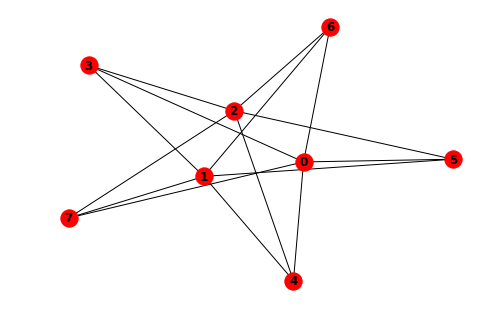

In [29]:
nx.draw(K35, with_labels=True, font_weight='bold')

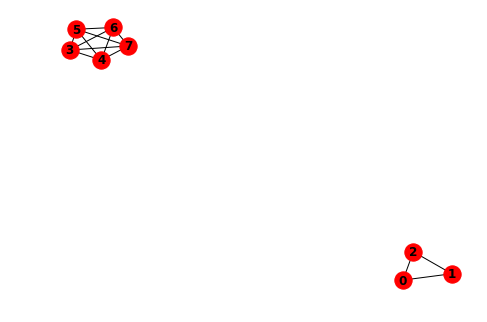

In [30]:
nx.draw(K35c, with_labels=True, font_weight='bold')

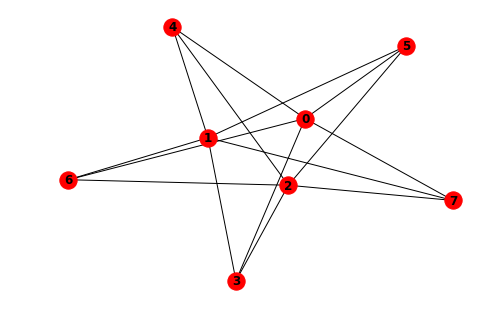

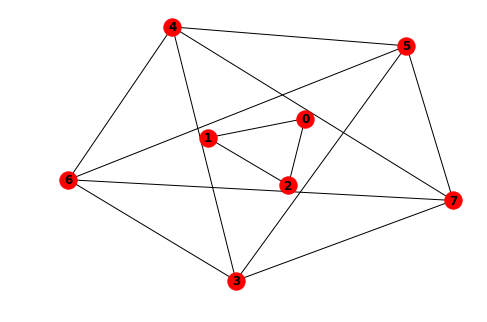

In [31]:
positions = nx.spring_layout(K35)

plt.figure(0)
nx.draw(K35, positions, with_labels=True, font_weight='bold')

plt.figure(1)
nx.draw(K35c, positions, with_labels=True, font_weight='bold')

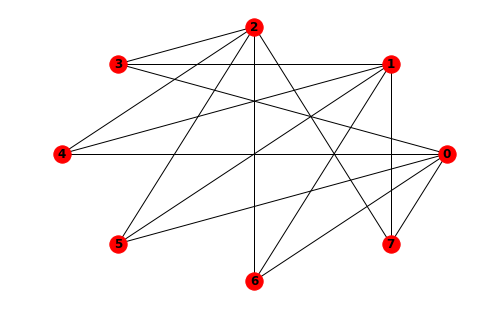

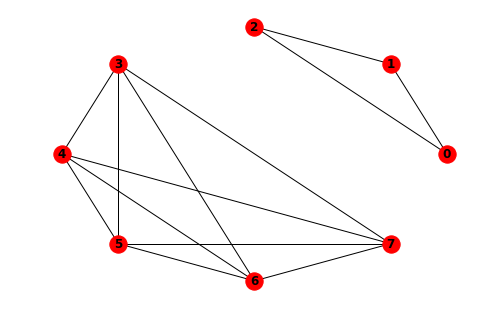

In [32]:
positions = nx.shell_layout(K35)

plt.figure(0)
nx.draw(K35, positions, with_labels=True, font_weight='bold')

plt.figure(1)
nx.draw(K35c, positions, with_labels=True, font_weight='bold')

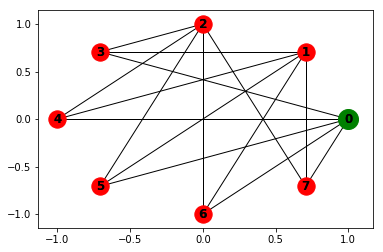

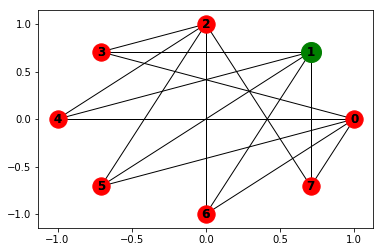

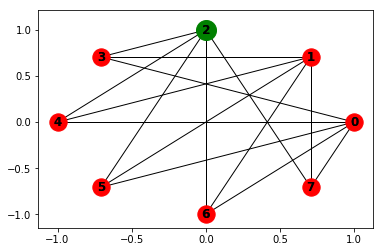

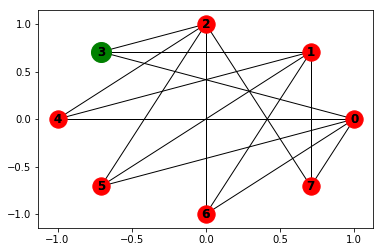

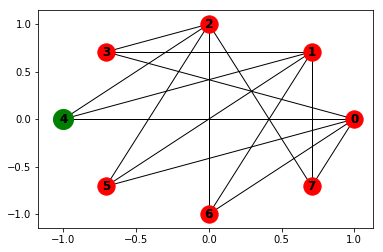

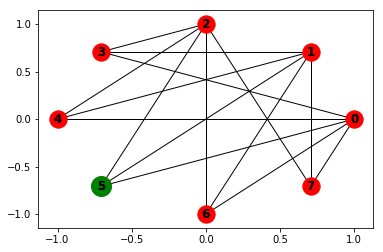

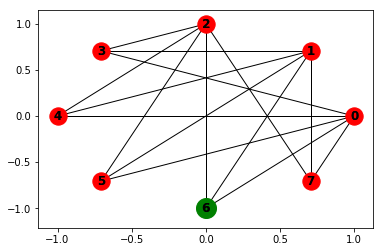

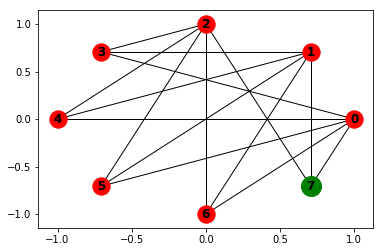

In [36]:
positions = nx.shell_layout(K35)

for i in range(8):
    plt.figure(0)
    ax = plt.gca()
    nx.draw_networkx(K35, positions, ax=ax, with_labels=True, font_weight='bold')
    nx.draw_networkx(K35, positions, ax=ax, nodelist=[i], edgelist=[], node_size=400, node_color='g')
    plt.show()


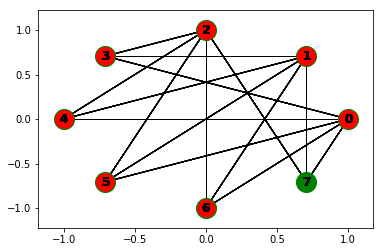

In [46]:
from matplotlib import animation, rc
from IPython.display import HTML

positions = nx.shell_layout(K35)

fig, ax = plt.subplots()

def init_frame():
    nx.draw_networkx(K35, positions, ax=ax, with_labels=True, font_weight='bold')
    return []

def frame(i):
    nx.draw_networkx(K35, positions, ax=ax, with_labels=True, font_weight='bold')
    nx.draw_networkx(K35, positions, ax=ax, nodelist=[i], edgelist=[], node_size=400, node_color='g')
    return []

anim = animation.FuncAnimation(fig, frame, init_func=init_frame, frames=8, interval=800, blit=True)
HTML(anim.to_jshtml())



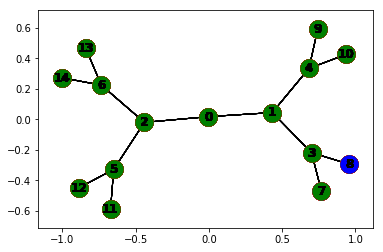

In [48]:
tree = nx.balanced_tree(2, 3)

fig, ax = plt.subplots()
positions = nx.spring_layout(tree)

N = len(tree.nodes)
stack = [0]
visits = np.zeros(N, dtype=bool)
history = []

while len(stack) > 0:
    node = stack.pop(-1)
    if not visits[node]:
        visits[node] = True
        stack += list(tree[node])
        history += [(node, visits.copy())]


nodes = np.array(tree.nodes)
nodes[visits]

def frame(i):
    node, visits = history[i]    
    nx.draw_networkx(tree, positions, ax=ax, with_labels=True, font_weight='bold')
    nx.draw_networkx(tree, positions, ax=ax, nodelist=list(nodes[visits]), edgelist=[], node_color='g')
    nx.draw_networkx(tree, positions, ax=ax, nodelist=[node], edgelist=[], node_color='b')
    return []

def init():
    nx.draw_networkx(tree, positions, ax=ax, with_labels=True, font_weight='bold')
    return []

anim = animation.FuncAnimation(fig, frame, init_func=init, frames=len(history), interval=800, blit=True)

HTML(anim.to_jshtml())

In [64]:
BRANCO = 0
CINZA = 1
PRETO = 2
MAPA_CORES = np.array(['B', 'C', 'P'])

def busca_transversal(G, isdfs, inicio, historia=[]):
    pivo = -1 if isdfs else 0
    
    N = len(G.nodes)
    cor = BRANCO * np.ones(N, dtype=int)
    
    stack = [inicio]
    cor[inicio] = CINZA
    
    while len(stack) > 0:
        u = stack.pop(pivo)
        for v in G[u]:
            if cor[v] == BRANCO:
                cor[v] = CINZA
                stack.append(v)
        
        cor[u] = PRETO
        if not (historia is None):
            historia.append([u, cor.copy()])
    
    return historia

historia = busca_transversal(tree, True, 0)
for (u, cor) in historia:
    print('Visitou o nó {}. Cor={}'.format(u, MAPA_CORES[cor]))


Visitou o nó 0. Cor=['P' 'C' 'C' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B']
Visitou o nó 2. Cor=['P' 'C' 'P' 'B' 'B' 'C' 'C' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B']
Visitou o nó 6. Cor=['P' 'C' 'P' 'B' 'B' 'C' 'P' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'C']
Visitou o nó 14. Cor=['P' 'C' 'P' 'B' 'B' 'C' 'P' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'P']
Visitou o nó 13. Cor=['P' 'C' 'P' 'B' 'B' 'C' 'P' 'B' 'B' 'B' 'B' 'B' 'B' 'P' 'P']
Visitou o nó 5. Cor=['P' 'C' 'P' 'B' 'B' 'P' 'P' 'B' 'B' 'B' 'B' 'C' 'C' 'P' 'P']
Visitou o nó 12. Cor=['P' 'C' 'P' 'B' 'B' 'P' 'P' 'B' 'B' 'B' 'B' 'C' 'P' 'P' 'P']
Visitou o nó 11. Cor=['P' 'C' 'P' 'B' 'B' 'P' 'P' 'B' 'B' 'B' 'B' 'P' 'P' 'P' 'P']
Visitou o nó 1. Cor=['P' 'P' 'P' 'C' 'C' 'P' 'P' 'B' 'B' 'B' 'B' 'P' 'P' 'P' 'P']
Visitou o nó 4. Cor=['P' 'P' 'P' 'C' 'P' 'P' 'P' 'B' 'B' 'C' 'C' 'P' 'P' 'P' 'P']
Visitou o nó 9. Cor=['P' 'P' 'P' 'C' 'P' 'P' 'P' 'B' 'B' 'P' 'C' 'P' 'P' 'P' 'P']
Visitou o nó 10. Cor=['P' 'P' 'P' 'C' 'P' 'P' 'P' 'B' 'B' 'P' 'P' 'P' 'P' 'P' 'P']
Visitou o n

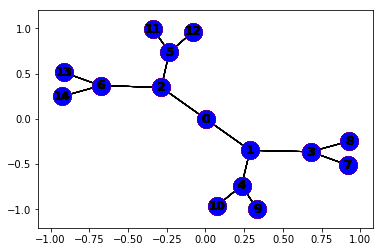

In [60]:
fig, ax = plt.subplots()
posicoes = nx.spring_layout(tree)
historia = busca_transversal(tree, True, 0)
nos = np.array(tree.nodes)

def init():
    nx.draw_networkx(tree, posicoes, ax=ax, with_labels=True, font_weight='bold', node_color='r')
    return []

def frame(i):
    init()
    if i == 0:
        return []

    u, cor = historia[i-1]
    brancos = nos[cor==BRANCO]
    cinzas = nos[cor==CINZA]
    pretos = nos[cor==PRETO]
    
    nx.draw_networkx(tree, posicoes, ax=ax, nodelist=list(brancos), edgelist=[], node_color='r')
    nx.draw_networkx(tree, posicoes, ax=ax, nodelist=list(cinzas), edgelist=[], node_color='g')
    nx.draw_networkx(tree, posicoes, ax=ax, nodelist=list(pretos), edgelist=[], node_color='b')
    return []


anim = animation.FuncAnimation(fig, frame, init_func=init, frames=len(history)+1, interval=800, blit=True)

HTML(anim.to_jshtml())

In [74]:
BRANCO = 0
CINZA = 1
PRETO = 2
MAPA_CORES = np.array(['B', 'C', 'P'])

def menores_caminhos(G, inicio, historia=[]):
    
    N = len(G.nodes)
    cor = BRANCO * np.ones(N, dtype=int)
    dist = np.inf * np.ones(N, dtype=float)
    ante = N * [None]
    
    stack = [inicio]
    dist[inicio] = 0
    cor[inicio] = CINZA
    
    while len(stack) > 0:
        u = stack.pop(0)
        for v in G[u]:
            if cor[v] == BRANCO:
                ante[v] = u
                dist[v] = dist[u] + 1
                cor[v] = CINZA
                stack.append(v)
        
        cor[u] = PRETO
        if not (historia is None):
            historia.append([u, cor.copy(), ante.copy(), dist.copy()])
    
    return ante, dist

def desenrolar_caminho(u, v, ante):
    caminho = []
    w = v
    while w != u:
        caminho.append(w)
        w = ante[w]

    return list(reversed(caminho))

historia = []
ante, dist = menores_caminhos(tree, 0, historia)
for (u, cor, ante, dist) in historia:
    print('Visitou o nó {}. ante={}'.format(u, ante))

    
desenrolar_caminho(0, 6, ante)

Visitou o nó 0. ante=[None, 0, 0, None, None, None, None, None, None, None, None, None, None, None, None]
Visitou o nó 1. ante=[None, 0, 0, 1, 1, None, None, None, None, None, None, None, None, None, None]
Visitou o nó 2. ante=[None, 0, 0, 1, 1, 2, 2, None, None, None, None, None, None, None, None]
Visitou o nó 3. ante=[None, 0, 0, 1, 1, 2, 2, 3, 3, None, None, None, None, None, None]
Visitou o nó 4. ante=[None, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, None, None, None, None]
Visitou o nó 5. ante=[None, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, None, None]
Visitou o nó 6. ante=[None, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
Visitou o nó 8. ante=[None, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
Visitou o nó 7. ante=[None, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
Visitou o nó 10. ante=[None, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
Visitou o nó 9. ante=[None, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
Visitou o nó 11. ante=[None, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]
Visitou o nó 12. ante=[None, 0, 

[2, 6]